## 생선 분류하기

- 도미(Bream), 빙어(smelt) 구분해내기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./datasets/Fish.csv", encoding = "CP949")

In [3]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
np.unique(data['Species'])

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

### 도미와 빙어 데이터만 분리

In [6]:
Bream_data = data[data['Species'] == 'Bream']
Smelt_data = data[data['Species'] == 'Smelt']

In [7]:
# 도미 길이와 너비
bream_weight = Bream_data['Weight'].tolist()
bream_length = Bream_data['Length2'].tolist()

# 빙어 길이와 너비
smelt_weight = Smelt_data['Weight'].tolist()
smelt_length = Smelt_data['Length2'].tolist()

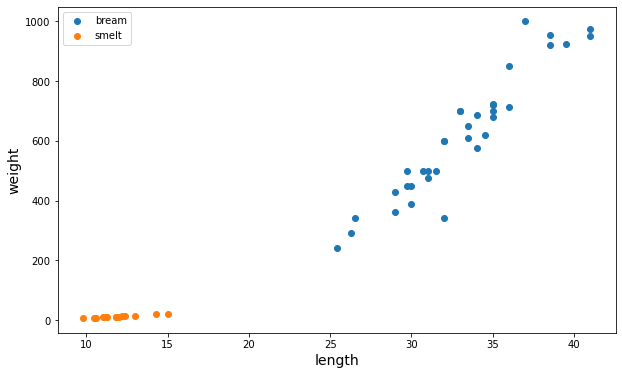

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(bream_length, bream_weight, label = 'bream')
plt.scatter(smelt_length, smelt_weight, label = 'smelt')
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.legend()
plt.show()

도미와 빙어는 선형적인 데이터. 대신 도미는 빙어에 비해 무게와 길이가 높다.

## KNN 최근접 이웃

- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다.

- 다만, 이러한 점으로 인해 데이터가 아주 많은 경우, 많은 메모리가 강요되며 직선거리를 계산하는 데도 많은 시간이 필요하다.

In [9]:
# 2가지 데이터를 하나의 리스트로
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
# 2개의 리스트를 2차원 리스트로
fish_data = [[l,w] for l,w in zip(length,weight)]

In [11]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


np.column_stack을 사용해도 된다.

In [12]:
# 1 : 도미, 0 : 빙어
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


np.concatenate((np.ones(35),np.zeros(14))를 사용해도 된다.

np.column_stack : 리스트 2개를 각각의 열로 <br>
np.concatenate : 리스트 2개를 하나의 행으로

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
# 모델 훈련
kn.fit(fish_data, fish_target)
# 모델 점수
kn.score(fish_data, fish_target)

1.0

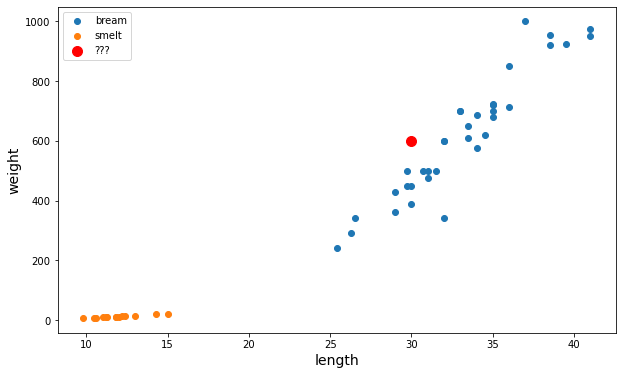

해당 품종은 : [1]


In [14]:
plt.figure(figsize = (10,6))
plt.scatter(bream_length, bream_weight, label = 'bream')
plt.scatter(smelt_length, smelt_weight, label = 'smelt')
plt.scatter(30,600, c = 'r',s = 100, label  = '???')
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.legend()
plt.show()


print("해당 품종은 :", kn.predict([[30,600]]))

앞선 모델은 정확도가 1이 나왔으나, 해당 모델을 바로 사용하기엔 어려움이 있다. 학습한 데이터를 그대로 모델 성능 평가에 사용했기 때문이다. 

train, test로 분리해서 훈련해보자

In [15]:
train_data = fish_data[:35]
train_target = fish_target[:35]
test_data = fish_data[35:]
test_target = fish_target[35:]

In [16]:
kn = KNeighborsClassifier()
kn.fit(train_data,train_target)

KNeighborsClassifier()

In [17]:
kn.score(test_data, test_target)

0.0

#### test 데이터를 훈련시켜본 결과 정확도가 0점이 나왔다

- 빙어와 도미가 train 데이터에 골고루 섞여있어야하는데 train 데이터에는 빙어만 들어가있기때문
> train, test데이터에 샘플이 골고루 섞여있지 않을 경우 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향**이라고 함.

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fish_data, fish_target, random_state = 42 , test_size = 0.25)

In [19]:
# 도미 10, 빙어 3
y_test

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
# test 데이터 성능
kn.score(x_test,y_test)

1.0

앞서 train과 test를 분리했으나 도미와 빙어의 수가 35:14로 여전히 샘플링 편향이 일어날 확률이 있다.

이럴땐 train_test_split의 stratify를 사용하면 클래스 비율에 맞게 데이터를 나눈다.
> 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용하게 사용할 수 있다.

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42 , test_size = 0.25)

In [23]:
# 도미 9, 빙어 4
y_test

[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
print("knn 스코어 :",kn.score(x_test, y_test))

knn 스코어 : 1.0


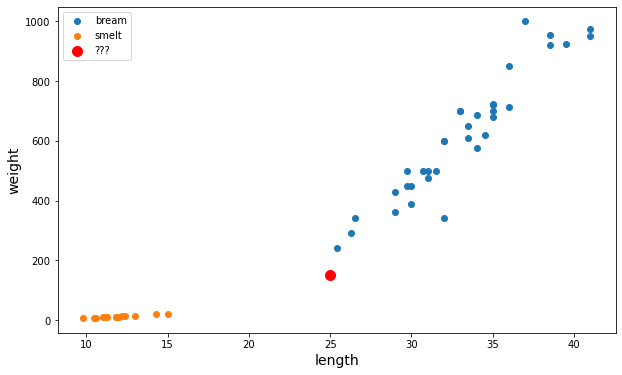

해당 품종은 : [0]


In [26]:
plt.figure(figsize = (10,6))
plt.scatter(bream_length, bream_weight, label = 'bream')
plt.scatter(smelt_length, smelt_weight, label = 'smelt')
plt.scatter(25,150, c = 'r',s = 100, label  = '???')
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.legend()
plt.show()


print("해당 품종은 :", kn.predict([[25,150]]))

앞서 만든 모델로 길이가 25이상일 경우 도미 데이터임을 가정하고 예측 돌려본 결과 예상과 달리 빙어로 예측했다.
왜???


추측 : KNN은 이웃까지의 거리와 이웃 샘플의 인덱스를 반환하는 알고리즘, 아마 5개의 이웃 중 다수가 빙어와 가깝지않을까 예상. 

#### 추측을 기반으로 모델 학습

In [27]:
distances, indexes = kn.kneighbors([[25,150]])

In [28]:
copy_x_train = np.array(x_train).copy()

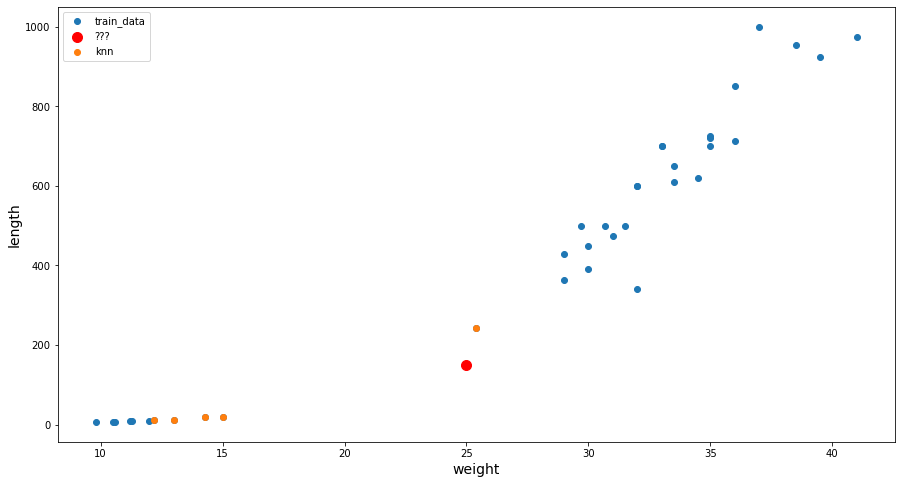

In [29]:
plt.figure(figsize = (15,8))
plt.scatter(copy_x_train[:,0], copy_x_train[:,1], label = 'train_data')
plt.scatter(25,150, c = 'r', s = 100, label = "???")
plt.scatter(copy_x_train[indexes,0], copy_x_train[indexes,1], label = 'knn')
plt.xlabel('weight', fontsize = 14)
plt.ylabel('length', fontsize = 14)
plt.legend()
plt.show()

예상대로 새로운 데이터에 가장 가까운 데이터는 0 : 빙어였다. 그러나 그래프 상으로 보면 빙어보다 도미의 거리가 더 가까워 보이는게 맞는데 knn은 빙어가 이웃한다고 판단했다.

In [30]:
# 이웃간 거리
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

이웃간 거리를 확인해 본 결과 첫 번째 거리는 92인 반면, 나머지는 130대로 나타났다. 그래프를 다시 살펴보면, 92에 비해 130의 거리가 상당히 멀게 느껴진다... 아마 그래프 비율을 다시 지정해봐야 하지 않나 싶다.

이웃이 5개가 나온 이유는 KNN의 기본 이웃값 K가 5이기 때문이다. KNN에서는 적절한 K를 찾아주는 작업이 필요하며, n_neighbors 파라미터를 활용하여 K값을 지정해줄 수 있다.

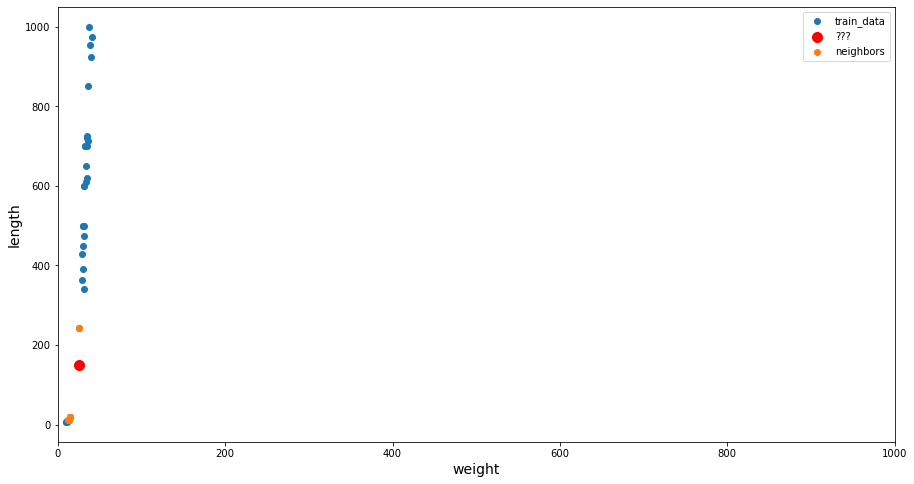

In [55]:
plt.figure(figsize = (15,8))
plt.scatter(copy_x_train[:,0], copy_x_train[:,1], label = 'train_data')
plt.scatter(25,150, c = 'r', s = 100, label = "???")
plt.scatter(copy_x_train[indexes,0], copy_x_train[indexes,1], label = 'neighbors')
plt.xlim(0,1000)
plt.xlabel('weight', fontsize = 14)
plt.ylabel('length', fontsize = 14)
plt.legend()
plt.show()

x축 범위를 y축과 동일하게 0~1000으로 맞춰 그래프를 그려봤다.

이전 그래프와 달리, y축에 의해 결과가 반영된 것임을 알 수 있다. 다만 지금의 그래프를 확인하여 데이터를 파악한다면 y축인 생선의 무게만 탐색이 가능할 것이다. -> 길이와 무게간의 적절한 스케일 조절이 필요함을 생각해볼 수 있었다.

스케일 조절 방법에는 다양한 방법이 있지만 특성값이 0에서 표준편차의 몇 배만큼 떨어져있는지를 판단하는 StandardScaler를 사용할 생각이다.

In [32]:
# standard 스케일 시행
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
train_scaled = (x_train - mean)/std
new = ([25,150] - mean)/std

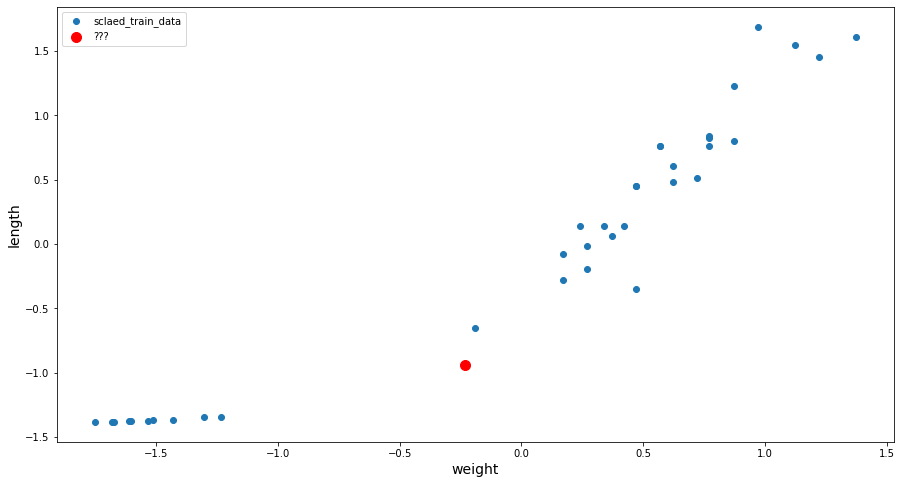

In [33]:
plt.figure(figsize = (15,8))
plt.scatter(train_scaled[:,0], train_scaled[:,1], label = 'sclaed_train_data')
plt.scatter(new[0], new[1], c = 'r', s = 100, label = "???")
plt.xlabel('weight', fontsize = 14)
plt.ylabel('length', fontsize = 14)
plt.legend()
plt.show()

스케일링 진행 후 재차 모델 학습

In [39]:
kn.fit(train_scaled, y_train)

KNeighborsClassifier()

스케일링을 해줄때는 반드시 test도 해줘야한다. 대신 train데이터의 평균과 표준편차로 변환해야하며 그렇지 않을 경우 데이터의 스케일이 같아지지않아 모델의 성능에 큰 문제가 발생한다.

In [41]:
# test 스케일 조절
test_scaled = (x_test-mean)/std

In [43]:
print("스케일 조절한 knn score :" ,kn.score(test_scaled, y_test))

스케일 조절한 knn score : 1.0


In [47]:
print(kn.predict([new]))

[1]


#### 이전과 달리 드디어 도미 : 1 로 예측했다.

In [49]:
distances, idx = kn.kneighbors([new])

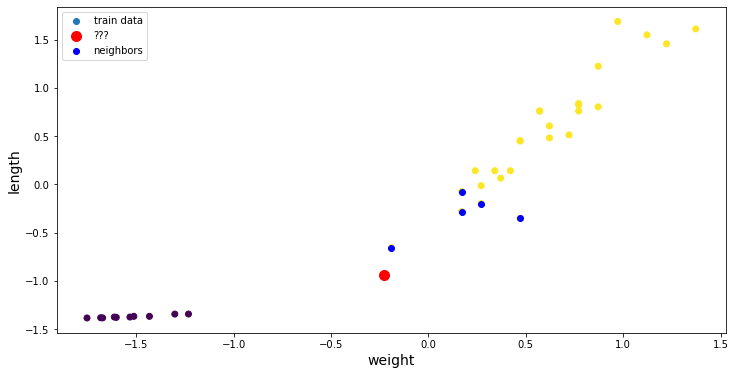

In [61]:
plt.figure(figsize = (12,6))
plt.scatter(train_scaled[:,0],train_scaled[:,1], label = 'train data', c = y_train)
plt.scatter(new[0],new[1], label = '???', s = 100, c = 'r')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], label = 'neighbors', c = 'b')
plt.xlabel('weight', fontsize = 14)
plt.ylabel('length', fontsize = 14)
plt.legend()
plt.show()

그래프로 그려본 결과 역시 스케일링 전과 달리 가장 가까운 샘플들이 모두 1로 나왔다.


무게와 길이의 스케일 조절만으로 유의미한 결과를 뽑아낼 수 있다.

## KNNRegressor

- 샘플과 가까운 클래스 k개를 선택하는게 knn 분류였다면  회귀는 샘플과 클래스들간의 거리 k의 평균을 사용한다.


앞에서 사용한 생선 정보 데이터에서 농어를 의미하는 Perch의 길이로 무게를 예측하는 모델을 만들어볼 예정이다.

In [64]:
np.unique(data['Species'])

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [65]:
perch_data = data[data['Species'] == 'Perch']

In [68]:
perch_length = perch_data['Length2']
perch_weight = perch_data['Weight']

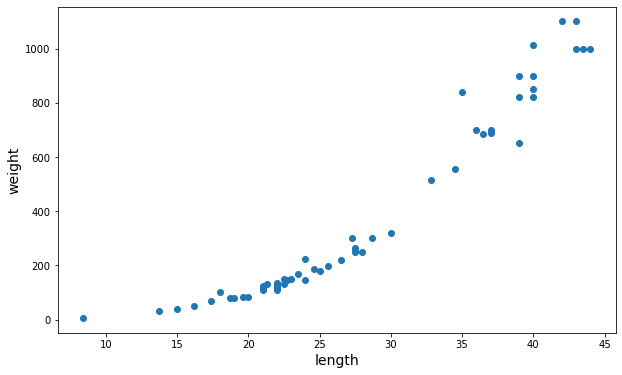

In [74]:
# 시각화
plt.figure(figsize = (10,6))
plt.scatter(perch_length, perch_weight)
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(perch_length, perch_weight, random_state = 42)

In [92]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 1)
(14, 1)
(42,)
(14,)


In [94]:
# 이웃근접회귀 학습
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [96]:
# 
print("KNR R^2:",knr.score(x_test,y_test))

KNR R^2: 0.992809406101064


In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

In [103]:
print("평균 제곱 오차:", mse)
print("평균 절대값 오차:", mae)

평균 제곱 오차: 721.7385714285714
평균 절대값 오차: 19.157142857142862


In [104]:
print("train data의 r^2 score:", knr.score(x_train,y_train))
print("test data의 r^2 score:", knr.score(x_test,y_test))

train data의 r^2 score: 0.9698823289099254
test data의 r^2 score: 0.992809406101064


모델을 훈련시킬 때 과대적합과 과소적합 여부를 고려해봐야한다.

### 과대적합 : train 세트에만 잘 맞는 모델, test나 새로운 데이터셋으로 예측을 할 때 성능이 낮게 나오는 경우
- 너무 복잡한 모델 사용시 발생,  모델에 규제를 더함

### 과소적합 : train 세트에서보다 test 데이터에서 점수가 더 높게 나오거나 둘다 낮게 나오는 경우
- 데이터가 너무 적은 경우, 모델이 너무 단순하여 train 데이터에 적절히 학습되지 않은 경우 발생, 모델을 좀더 복잡하게 구성


해당 데이터 역시 test 데이터가 train 데이터보다 score가 높게 나오기때문에 과소적합을 의심해 볼 수 있다.

KNN은 이웃의 수 K를 조절하여 모델의 복잡성을 추가, 완화 시킬수 있다. 따라서 모델의 이웃의 수를 좀더 줄여본다.

In [106]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [107]:
print("train data의 r^2 score:", knr.score(x_train,y_train))
print("test data의 r^2 score:", knr.score(x_test,y_test))

train data의 r^2 score: 0.9804899950518966
test data의 r^2 score: 0.9746459963987609


모델의 이웃수를 줄여본 결과, train data의 점수가 test data보다 높아졌으며 2개의 결과 간 점수 차이가 근소하게 난다.

과소적합 문제가 다소 해결되었다고 판단해도 좋을듯 하다.

In [109]:
pred = knr.predict(x_test)

In [114]:
y_test

72        5.9
77      100.0
105     250.0
85      130.0
91      130.0
122     820.0
108     320.0
98      188.0
116     900.0
84      125.0
126    1000.0
75       51.5
106     250.0
102     300.0
Name: Weight, dtype: float64

In [123]:
pred

array([  47.33333333,   76.        ,  247.66666667,  120.        ,
        143.33333333,  921.66666667,  275.        ,  183.33333333,
        773.33333333,  120.        , 1033.33333333,   62.66666667,
        275.        ,  247.66666667])

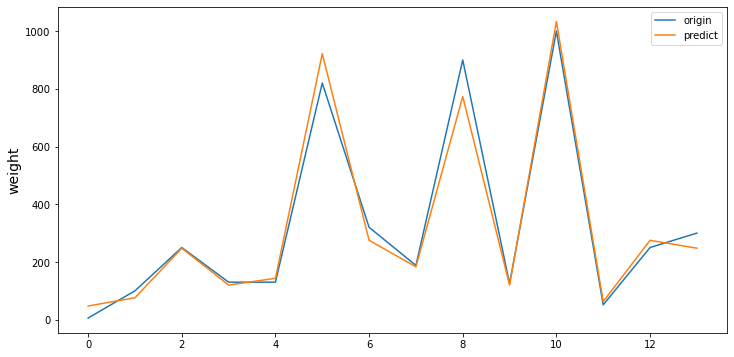

In [133]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(0,14),y_test , label = 'origin')
plt.plot(np.arange(0,14),pred, label = 'predict')
plt.ylabel('weight', fontsize = 14)
plt.legend()
plt.show()

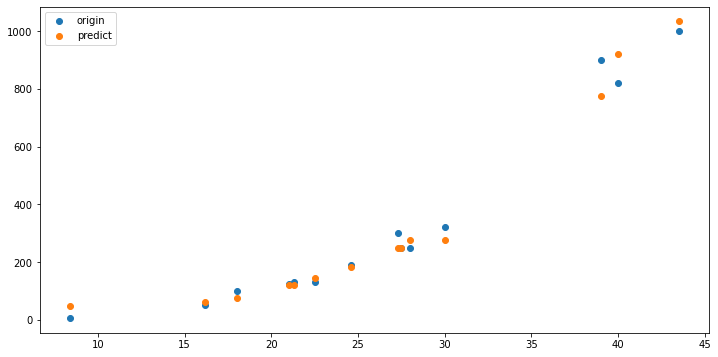

In [141]:
plt.figure(figsize = (12,6))
plt.scatter(x_test, y_test, label = 'origin')
plt.scatter(x_test, pred, label = 'predict')
plt.legend()
plt.show()

knn 이웃 회귀는 각각의 거리를 계산하여 구한다. 그렇기 때문에 데이터의 개수가 늘어날수록 계산 시간은 늘어날 수 밖에 없다.<br>
knn의 이러한 단점을 보완하여 구성할 수 있는게 선형 회귀이다.